In [12]:
version = 2.0
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline
#import time as dt

In [13]:
class Attractor(object):
    def __init__(self, s=10.0, p=28.0, b=8.0/3.0, start=0.0, end=80.0, points=10000):
        self.s = s
        self.p = p
        self.b = b
        self.start = start
        self.end = end
        self.points = points
        self.params = np.array([s, p, b])
        self.dt = (self.end-self.start)/self.points   
        self.x = np.zeros([])
        self.y = np.zeros([])
        self.z = np.zeros([])
        self.t = np.zeros([])
        
    def fxn1(self, yt, xt, ss, ddt):
        return ss*(yt - xt)*ddt
    
    def fxn2(self, yt, xt, zt, pp, ddt):
        return (xt*(pp - zt) - yt)*ddt
    
    def fxn3(self, yt, xt, zt, bb, ddt):
        return (xt*yt - bb*zt)*ddt
    
    def euler(self, xyzarray):
        self.x = np.zeros(self.points + 1)
        self.y = np.zeros(self.points + 1)
        self.z = np.zeros(self.points + 1)
        self.t = np.zeros(self.points + 1)
        
        self.x[0] = xyzarray[0]
        self.y[0] = xyzarray[1]
        self.z[0] = xyzarray[2]
                
        for i in xrange(self.points):
            self.x[i+1] = self.x[i] + self.fxn1(self.y[i],self.x[i],self.s,self.dt)
            self.y[i+1] = self.y[i] + self.fxn2(self.y[i],self.x[i],self.z[i],self.p,self.dt)
            self.z[i+1] = self.z[i] + self.fxn3(self.y[i],self.x[i],self.z[i],self.b,self.dt)
            
            self.t[i+1] = self.t[i] + self.dt
                
        return (self.x, self.y, self.z)
    
    def rk2(self, xyzarray):
        self.x = np.zeros(self.points + 1)
        self.y = np.zeros(self.points + 1)
        self.z = np.zeros(self.points + 1)
        self.t = np.zeros(self.points + 1)
        
        self.x[0] = xyzarray[0]
        self.y[0] = xyzarray[1]
        self.z[0] = xyzarray[2]
        
        for i in xrange(self.points):
            k1_x = self.fxn1(self.y[i],self.x[i],self.s,self.dt)
            k2_x = self.fxn1(self.y[i],k1_x*(.5*self.dt)+self.x[i],self.s,self.dt)
            self.x[i+1] = self.x[i] + (.5*(k1_x + k2_x))
            
            k1_y = self.fxn2(self.y[i],self.x[i],self.z[i],self.p,self.dt)
            k2_y = self.fxn2(self.y[i]+k1_y*(.5*self.dt),self.x[i],self.z[i],self.p,self.dt)
            self.y[i+1] = self.y[i] + (.5*(k1_y + k2_y))
            
            k1_z = self.fxn3(self.y[i],self.x[i],self.z[i],self.b,self.dt)
            k2_z = self.fxn3(self.y[i],self.x[i],self.z[i]+k1_z*(.5*self.dt),self.b,self.dt)
            self.z[i+1] = self.z[i] + (.5*(k1_z + k2_z))
            
            self.t[i+1] = self.t[i] + self.dt
               
        return (self.x,self.y,self.z)
    

    def rk4(self, xyzarray):
        self.x = np.zeros(self.points + 1)
        self.y = np.zeros(self.points + 1)
        self.z = np.zeros(self.points + 1)
        self.t = np.zeros(self.points + 1)
        
        self.x[0] = xyzarray[0]
        self.y[0] = xyzarray[1]
        self.z[0] = xyzarray[2]
        
        for i in xrange(self.points):
            k1_x = self.fxn1(self.y[i],self.x[i],self.s,self.dt)
            k2_x = self.fxn1(self.y[i],k1_x*(.5*self.dt)+self.x[i],self.s,self.dt)
            k3_x = self.fxn1(self.y[i],k2_x*(.5*self.dt)+self.x[i],self.s,self.dt)
            k4_x = self.fxn1(self.y[i],k3_x*self.dt+self.x[i],self.s,self.dt)
            self.x[i+1] = self.x[i] + (self.dt/6)*(k1_x + 2*k2_x + 2*k3_x + k4_x)
            
            k1_y = self.fxn2(self.y[i],self.x[i],self.z[i],self.p,self.dt)
            k2_y = self.fxn2(self.y[i]+k1_y*(.5*self.dt),self.x[i],self.z[i],self.p,self.dt)
            k3_y = self.fxn2(self.y[i]+k2_y*(.5*self.dt),self.x[i],self.z[i],self.p,self.dt)
            k4_y = self.fxn2(self.y[i]+k3_y*self.dt,self.x[i],self.z[i],self.p,self.dt)
            self.y[i+1] = self.y[i] + (self.dt/6)*(k1_y + 2*k2_y + 2*k3_y + k4_y)
            
            k1_z = self.fxn3(self.y[i],self.x[i],self.z[i],self.b,self.dt)
            k2_z = self.fxn3(self.y[i],self.x[i],self.z[i]+k1_z*(.5*self.dt),self.b,self.dt)
            k3_z = self.fxn3(self.y[i],self.x[i],self.z[i]+k2_z*(.5*self.dt),self.b,self.dt)
            k4_z = self.fxn3(self.y[i],self.x[i],self.z[i]+k3_z*self.dt,self.b,self.dt)
            self.z[i+1] = self.z[i] + (self.dt/6)*(k1_z + 2*k2_z + 2*k3_z + k4_z)
        
            self.t[i+1] = self.t[i] + self.dt
        
        return (self.x, self.y, self.z)
    
    def evolve(self,r0=[.1,0.0,0.0], order=4):
        x0 = r0[0]
        y0 = r0[1]
        z0 = r0[2]
        
        if order == 1:
            self.euler(r0)
        elif order == 2:
            self.rk2(r0)
        else:
            self.rk4(r0)

        self.solution = pd.DataFrame({'time': self.t, 'x': self.x, 'y': self.y, 'z': self.z})
        
        return self.solution
        
    def save(self):
        self.solution.to_csv('data.csv')
              
    def plotx(self):
        self.solution.plot(x='time',y='x',style='g-', title = 'x(t) vs Time Solution')
    
    def ploty(self):
        self.solution.plot(x='time',y='y',style='b-', title = 'y(t) vs Time Solution')
    
    def plotz(self):
        self.solution.plot(x='time',y='z',style='r-', title = 'z(t) vs Time Solution')
    
    def plotxy(self):
        self.solution.plot(x='x',y='y',style='y-', title = 'x(t) vs Time Solution')
    
    def plotyz(self):
        self.solution.plot(x='y',y='z',style='m-', title = 'y(t) vs Time Solution')
    
    def plotzx(self):
        self.solution.plot(x='z',y='x',style='c-', title = 'z(t) vs Time Solution')
    
    def plot3d(self):
        fig = plt.figure()
        ax = fig.gca(projection='3d')
        ax.plot_trisurf(self.x, self.y, self.z, cmap=cm.jet, linewidth=.2)
        ax.set_xlabel('x(t)')
        ax.set_ylabel('y(t)')
        ax.set_zlabel('z(t)')
        plt.show()         
        
    def plot3dwf(self):
        fig = plt.figure()
        ax = fig.gca(projection='3d')
        ax.plot_wireframe(self.x, self.y, self.z, rstride=10, cstride=10)
        ax.set_xlabel('x(t)')
        ax.set_ylabel('y(t)')
        ax.set_zlabel('z(t)')
        plt.show()         
            

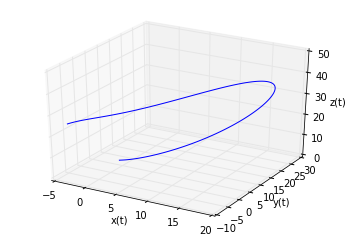

In [11]:
attr = Attractor()
#attr.euler([1,2,3])
#attr.rk2([1,2,3])
#attr.rk4([1,2,3])
attr.evolve([1,1,5], 4)
#attr.save()
#attr.plotx()
#attr.ploty()
#attr.plotz()
#attr.plotxy()
#attr.plotyz()
#attr.plotzx()
#attr.plot3d()
attr.plot3dwf()

In [8]:
attr = Attractor()
attr.params

array([ 10.        ,  28.        ,   2.66666667])